# Plotting Graphs

Here we will continue introducing basic ideas from Python. The following book is a good reference:

* <em>Programming for Computations - Python</em> by Svein Linge and Hans Petter Langtangen.

We will be jumping around a bit in this book so that we can quickly cover the main things we will need.

In this notebook, we will:
* Discuss tuples and lists. (See LL &sect; 5.1)
* Discuss Numpy arrays (LL &sect; 1.4 and 2.3)
* Describe how to plot functions of one-variable with Matplotlib. (LL &sect; 1.6)
* Discuss functions (LL &sect; 4)
* Discuss functions returning functions (closures)

## Tuples

A tuple is a collection of objects that can not be changed. The objects are normally expressed as a list of objects surrounded by parenthesis. For example:

In [1]:
x = (1, 'cat', 5/3)
x

(1, 'cat', 1.6666666666666667)

The number of objects making up a tuple can be accessed with the `len` function.

In [2]:
len(x)

3

The individual objects can be accessed using square brackets. Objects are indexed with `0` representing the first object, `1` representing the last object and so on. The last object would then have index `len(x)-1`. 

In [3]:
print(f'The first object is {x[0]}.')
print(f'The second object is {x[1]}.')
print(f'The third object is {x[2]}.')

The first object is 1.
The second object is cat.
The third object is 1.6666666666666667.


You can use negative numbers to access the objects from the right side. It is common to use `x[-1]` to access the last element.

In [4]:
print(f'The last object is {x[-1]}.')
print(f'The second to last object is {x[-2]}.')

The last object is 1.6666666666666667.
The second to last object is cat.


Adding two tuples concatenates them.

In [5]:
y = ("Hi", "there!")
x+y

(1, 'cat', 1.6666666666666667, 'Hi', 'there!')

Since addition concatantes, integer multiplication also does. So, `2*x` is the same as `x+x`:

In [6]:
2*x

(1, 'cat', 1.6666666666666667, 1, 'cat', 1.6666666666666667)

A common use for tuples is to represent a vector or point with multiple coordinates. For example:

In [7]:
v = (1, 2.5, 7)

might represent a point in space. Then you might want to access the $x$-, $y-$ and $z$-coordinates. This can be done in one line:

In [8]:
x, y, z = v
print(f'x={x}, y={y}, and z={z}.')

x=1, y=2.5, and z=7.


This is called *unpacking* a tuple. (Later we will see that Numpy arrays are better representations of vectors. You can also unpack Numpy arrays.)

## Lists

Lists are almost the same as tuples except their values can change. To construct a list we use square brackets instead of parenthesis.

In [9]:
a = [7, 8, 9]
print(a)

[7, 8, 9]


We can access the objects in the list as before:

In [10]:
print(f'The length of a is {len(a)}.')
print(f'The first object is {a[0]}.')
print(f'The second object is {a[1]}.')

The length of a is 3.
The first object is 7.
The second object is 8.


The values can change. You can overwrite an object using square brackets and the assignment operator `=`:

In [11]:
a[1] = 'ate'
a

[7, 'ate', 9]

You can also add new objects to the end of a list using the `append` method.

In [12]:
a.append(10)
a

[7, 'ate', 9, 10]

The insert method can be used to add an element in a given index. The objects currently in that index and greater indices are moves to the next position (i.e., their indices increase by one).

In [13]:
a.insert(0, 6)
a

[6, 7, 'ate', 9, 10]

In [14]:
a.insert(4, 9.5)
a

[6, 7, 'ate', 9, 9.5, 10]

You can remove the object from a particular position in an list using the `del` statement. So, `del a[i]` will remove the object at index `i`. For example,

In [15]:
del a[3]
a

[6, 7, 'ate', 9.5, 10]

You can get and remove an object at a given index with the `pop` method.

In [16]:
a.pop(3)

9.5

In [17]:
a

[6, 7, 'ate', 10]

Note that I am being terse with my explanations. You can find out more about these methods using their built in documentation. For example, if you want to learn more about the `pop` method, you can start with a list `a` and type `a.pop?` followed by *Shift+Enter*.

In [18]:
a.pop?

Documentation should appear at the bottom of the page looking like this:
<pre><span class="ansi-red-fg">Signature:</span> a<span class="ansi-blue-fg">.</span>pop<span class="ansi-blue-fg">(</span>index<span class="ansi-blue-fg">=</span><span class="ansi-blue-fg">-</span><span class="ansi-cyan-fg">1</span><span class="ansi-blue-fg">,</span> <span class="ansi-blue-fg">/</span><span class="ansi-blue-fg">)</span>
<span class="ansi-red-fg">Docstring:</span>
Remove and return item at index (default last).

Raises IndexError if list is empty or index is out of range.
<span class="ansi-red-fg">Type:</span>      builtin_function_or_method
</pre>
The signature above indicates that the method takes one parameter: the index. It also indicates that the default value of the parameter is `-1`, which represents the last item in the list. So, you can omit the parameter to perform the `pop` operation on the last item in the list:

In [19]:
a.pop()

10

In [20]:
a

[6, 7, 'ate']

I encourage you to take a look at the documentation of methods and built-in functions we use. Once you get used to the syntax, it can be quite useful. Built in documentation is a good reason to use Jupyter as opposed to a plain text document to program Python.

I have not described all the features of lists. To learn more see the [Python tutorial](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).

## Looping over tuples and lists

You can use a for loop to iterate over the objects in a list or tuple. Here is an example:

In [21]:
lst = [1, 4/3, "yak"]
lst

[1, 1.3333333333333333, 'yak']

Here we print what happens when we triple each object.

In [22]:
for x in lst:
    triple = 3*x
    print(f'{x} tripled is {triple}.')

1 tripled is 3.
1.3333333333333333 tripled is 4.0.
yak tripled is yakyakyak.


The colon `:` at the end of `for x in lst:` indicates that the line will be followed by a code block. In Python, code blocks are indicated through indentation. In Jupyter, code blocks are indented by 4 spaces (and pressing the tab button results in the insertion of 4 spaces at once). You will notice that Jupyter automatically indents for you if you enter type line ending with `:` followed by *enter*.

The code block gets executed once for each object in the list in order. In this case, the two indented lines get executed for each object in `lst`.

## Numerical Python (NumPy)

Numpy is the main numerical math package. It has support for vectors and matrices that Python lacks.

You load Numpy with the command:

In [23]:
import numpy as np    # standard way of importing numpy

Now commands in the Numpy package can be called with the syntax `np.command`.

In lieu of tuples, we can use numpy arrays for vectors. For example:

In [24]:
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [25]:
3*v

array([ 3,  6,  9, 12])

In [26]:
v+v

array([2, 4, 6, 8])

Computing `cos(v)` with `cos` from the math package will fail, but numpy has its own cosine function which evaluates termwise. So, `np.cos(v)` will compute
$$(\cos 1, \cos 2, \cos 3, \cos 4).$$

In [27]:
np.cos(v)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

You can type `np.` and press the Tab key to see what commands are available. Then you can type `np.abs?` and Shift-Enter (for example) to see the documentation of a command.

## Plotting with Matplotlib

You can import Mathplotlib's pyplot using:

In [28]:
import matplotlib.pyplot as plt

In [29]:
x = np.array([-2, -1, 0, 1, 2])

We'll plot the points $(x_i,y_i)$ where $x_i$ is in the list above and $y_i=x_i^2-1$. Arithmetic in arrays is done component wise. So the following list gives the y-values:

In [30]:
y = x*x-1
y

array([ 3,  0, -1,  0,  3])

The following gives a plot of the points $(x_i, y_i)$:

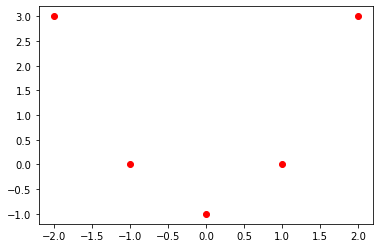

In [31]:
plt.plot(x, y, 'ro')
plt.show()

The string 'ro' above indicates that this is a list plot: The `o` indicates to plot points, and the `r` indicates to plot in red. Other options for plotting can be found by typing `plt.plot?` and Shift+Enter. You need to scroll down to the bottom of the Notes section to see a complete description of the `fmt` string. Alternately take a look at the [api posted to the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

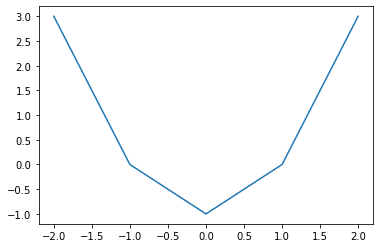

In [32]:
plt.show(plt.plot(x, y))

To get a nicer curve, we should use more points. The following gives 101 points equally spaced between -2 and 2:

In [33]:
x = np.linspace(-2, 2, 101) # 1001 might be better than 101...
x

array([-2.  , -1.96, -1.92, -1.88, -1.84, -1.8 , -1.76, -1.72, -1.68,
       -1.64, -1.6 , -1.56, -1.52, -1.48, -1.44, -1.4 , -1.36, -1.32,
       -1.28, -1.24, -1.2 , -1.16, -1.12, -1.08, -1.04, -1.  , -0.96,
       -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68, -0.64, -0.6 ,
       -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32, -0.28, -0.24,
       -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,  0.08,  0.12,
        0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,  0.44,  0.48,
        0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,  0.8 ,  0.84,
        0.88,  0.92,  0.96,  1.  ,  1.04,  1.08,  1.12,  1.16,  1.2 ,
        1.24,  1.28,  1.32,  1.36,  1.4 ,  1.44,  1.48,  1.52,  1.56,
        1.6 ,  1.64,  1.68,  1.72,  1.76,  1.8 ,  1.84,  1.88,  1.92,
        1.96,  2.  ])

In [34]:
y = x*x-1

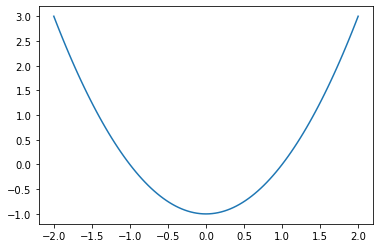

In [35]:
plt.plot(x, y)
plt.show()

Here is a nicer plot:

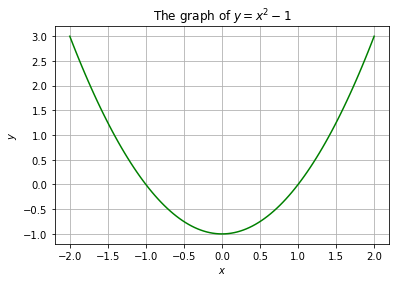

In [36]:
x = np.linspace(-2, 2, 101)
y = x*x-1
plot3 = plt.plot(x, y,'g')
plt.xlabel('$x$') # The dollar signs denote LaTeX.
plt.ylabel('$y$')
plt.title('The graph of $y=x^2-1$')
plt.grid(True)
plt.show()

The plot command can also plot several functions at once. You just repeat the notation inside of `plt.plot()` twice. For example:

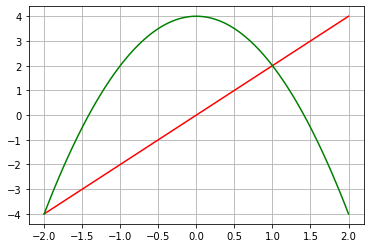

In [37]:
plt.plot(x, 2*x, 'r', x, 4-2*x**2, 'g')
plt.grid(True)
plt.show()

There is also no reason that the x-values have to be equally spaced. Here is an example.

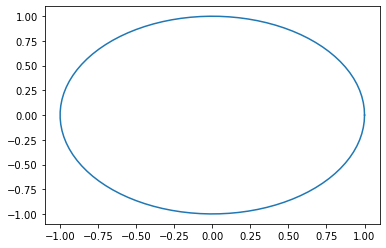

In [38]:
theta_values = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta_values), np.sin(theta_values))
plt.show()

Because of the aspect ratio, the circle looks like an ellipse. The following corrects this.

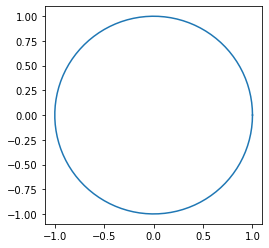

In [39]:
theta_values = np.linspace(0, 2*np.pi, 100)
plt.axes().set_aspect(1)
plt.plot(np.cos(theta_values), np.sin(theta_values))
plt.show()

## A taste of functions

I think it is good to introduce the idea of simple python functions for mathematics. (In programming, there is another related notion of function.)

The following represents the function $f(x)=x^3-x$.

In [40]:
def f(x):
    return x**3 - x

The line `def f(x):` defines a function. It is followed by a code block, which in this case is one line, a `return` statement. The quantity following `return` is returned by the function.

The function can act on numbers:

In [41]:
f(1)

0

In [42]:
f(2)

6

It also can be used for plotting.

In [43]:
x_values = np.linspace(-1.5, 1.5, 100)

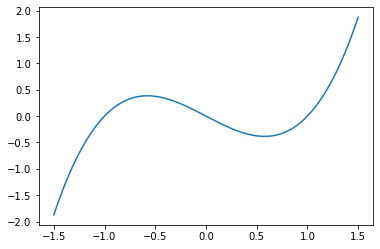

In [44]:
plt.plot(x_values, f(x_values))
plt.show()

In Python, functions can be defined to any object that the expression makes sense. For example, consider the following function:

In [45]:
def g(t):
    return 2*t

In [46]:
g(3)

6

In [47]:
g(3.0)

6.0

In [48]:
g('cat')

'catcat'

In [49]:
g([1, 2, 3])

[1, 2, 3, 1, 2, 3]

## Closures

In mathematics, functions often have paraemters. For example, the Gaussian is a family of functions that are central to probability theory. The functions come with parameters: the expected value, $m$, and the variation, $s$. The Gaussian is then the function
$$G_{s,m}(x)=\frac{1}{s \sqrt{2 \pi}} \exp \left(-\frac{1}{2} \left(\frac{x-m}{s}\right)^2\right).$$


In Python, functions can return pretty much anything. So, numbers, tuples, and strings are possible returns. In Python, the concept of *closure* is that a function retains access to local variables where it was defined. This is convienient for implementing parameters for functions.

Functions don't need to simply return numbers, they can return any Python object. In particular, a function can return a function. Here is an example of a closure when a function returns a function.

In [50]:
from numpy import sqrt, exp, pi

def gaussian(m, s):
    def f(x):
        return exp(-0.5 * ((x-m)/s)**2)/(sqrt(2*pi)*s)
    return f

The values of the variables `m` and `s` are available in the full function block for `gaussian`. So, even inside the definition of the function `f`, the variables can be used.

Note that `gaussian` returns the function `f`, and the function `f` can make use of the variables `m` and `s` that were passed to Gaussian.

The following gives the gaussian with $m=0$ and $s=2$.

In [51]:
g = gaussian(0, 2)

Then we can evaluate $g$ like a normal function.

In [52]:
g(1)

0.17603266338214976

The following plots the Gaussian.

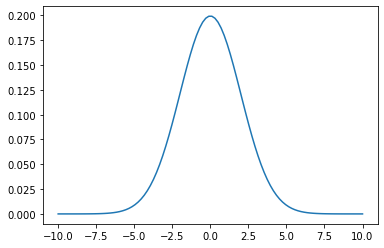

In [53]:
x_values = np.linspace(-10, 10, 100)
plt.plot(x_values, g(x_values))
plt.show()

For a reference on closures, see &sect; 7.1.7 of 
* *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 5th edition, 2016.

## Further examples of functions

The quadratic forumula can naturally be implemented as a function returning a pair of roots of the polynomial $$a x^2+bx+c.$$

In [54]:
def quadratic_formula(a, b, c):
    q = np.sqrt(b*b - 4*a*c) # The discriminant
    root1 = (-b + q)/(2*a)
    root2 = (-b - q)/(2*a)
    return (root1, root2)

In [55]:
quadratic_formula(1, -2, 1)

(1.0, 1.0)

In [56]:
quadratic_formula(2, -5, 2)

(2.0, 0.5)

We can define the polynomial $p(x) = ax^2+bx+c$. This is naturally a function with parameters $a$, $b$, and $c$. We can use curring to represent any such $p(x)$.

In [57]:
def quadratic_polynomial(a, b, c):
    def p(x):
        return a*x**2 + b*x + c
    return p

Here we plot the function $f(x) = \frac{1}{2} x^2 -1$.

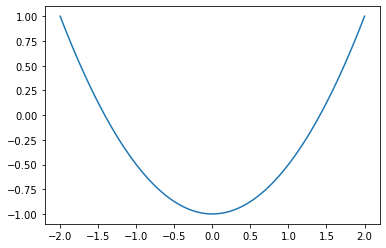

In [58]:
x_values = np.linspace(-2, 2, 100)
f = quadratic_polynomial(1/2, 0, -1)
plt.plot(x_values, f(x_values))
plt.show()